### André Campos da Silva
### 08 de Janeiro, 2021

### Projeto  -  Boston House Prices Prediction

Fazer uma analise nos dados e construir um modelo que permita faça previsões dos preços das casas. 

Dataset disponivel no link: https://www.kaggle.com/vikrishnan/boston-house-prices

Dicionario dos dados: 
The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town. (taxa de crime per capita por cidade)

ZN - proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terreno residencial zoneado para lotes com mais de 25.000 pés quadrados)

INDUS - proportion of non-retail business acres per town.(proporção de acres de negócios não varejistas por cidade)

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million). (concentração de óxidos nítricos-partes por 10 milhões)

RM - average number of rooms per dwelling.(número médio de quartos por habitação)

AGE - proportion of owner-occupied units built prior to 1940.(proporção de unidades ocupadas pelo proprietário construídas 
antes de 1940)

DIS - weighted distances to five Boston employment centres.(distâncias ponderadas para cinco centros de empregos de Boston)

RAD - index of accessibility to radial highways.(índice de acessibilidade a rodovias radiais)

TAX - full-value property-tax rate per 10,000. (taxa de imposto de propriedade de valor total por  10.000)

PTRATIO - pupil-teacher ratio by town.(proporção aluno-professor por cidade)

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT - % lower status of the population.(status inferior da população)

MEDV - Median value of owner-occupied homes in '1000'.(Valor médio das casas ocupadas pelo proprietário em US  1.000)

## Carregando pacotes

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import ElasticNet,LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,VotingRegressor,GradientBoostingRegressor,AdaBoostRegressor,StackingRegressor,ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2,RFE,mutual_info_regression,f_classif

## Carregando os Dados

In [2]:
# Carregos os dados de treino e teste.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_train = pd.read_csv('Dados/housing.csv',header=None, delimiter=r"\s+", names=column_names)

In [3]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Análise Exploratória de Dados

In [4]:
# Dimensões dos dados
df_train.shape

(506, 14)

In [5]:
# Tipo dos dados das variáveis
df_train.dtypes.value_counts()

float64    12
int64       2
dtype: int64

In [6]:
# Sumário estatístico das variáveis
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Verificar se existe valores nulos.
df_train.isnull().values.any()

False

In [8]:
# Realizando uma analise, verificamos que algumas variáveis são constantes ou seja, apresentam sempre  mesmo valor,
# Vamos extrair elas do data set pois para um algoritmo essas variáveis podem ser consideradas sem grande valor. 
uniquevalues = df_train.nunique()
uniquevalues = uniquevalues[uniquevalues==1]
uniquevalues.count()

0

### Funções auxiliares

In [9]:
def distPlot(data, col, label):
    sns.distplot(data[col], rug=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Distribuição')
    plt.show()

In [10]:
def boxplot(data, col, label):
    sns.boxplot(data[col])
    plt.title(f'BoxPlot Variável:{label}')
    plt.xlabel(label)
    plt.ylabel('Medidas')
    plt.show()

In [11]:
def barPlotH(data, col1, col2, title, labelx, labely, cor):
   sns.set(style="darkgrid")
   sns.barplot(x = col1,y = col2, data=data, color=cor)
   plt.title(title, fontsize=18,color="black",alpha=2)
   plt.xlabel(labelx, size = 12,color="black")
   plt.ylabel(labely, size = 12,color="black")
   sns.despine(left=True, bottom=True)
   plt.show()

In [12]:
def countPlot(data, col1, labelx,labely,title):
   sns.set(style="darkgrid")
   sns.countplot(x=col, data=data)
   plt.title(title)
   plt.xlabel(labelx) 
   plt.ylabel(labely)
   plt.show()

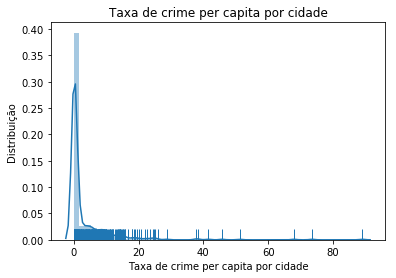

In [13]:
# Distribuição CRIM

# Defino a colula
col = 'CRIM'

# Defino o label
label= 'Taxa de crime per capita por cidade'

# Plot 
distPlot(df_train,col,label)

Variável CRIM tem uma distribuição bem segmentada tendo uma curva maior entre 0 e 6 aproximandamente.

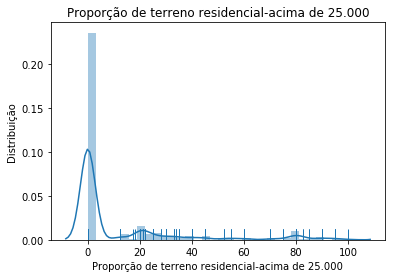

In [14]:
# Distribuição ZN

# Defino a colula
col = 'ZN'

# Defino o label
label= 'Proporção de terreno residencial-acima de 25.000'

# Plot 
distPlot(df_train,col,label)

Percebe que poucos são os terremos que possuem porporção maior que 25000 pés quadrados, a porporção esta bem concentrada no valor entre 0 e 5 aproximadamente   

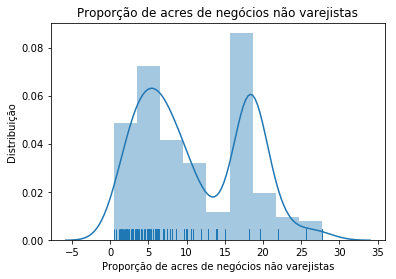

In [15]:
# Distribuição INDUS

# Defino a colula
col = 'INDUS'

# Defino o label
label= 'Proporção de acres de negócios não varejistas'

# Plot 
distPlot(df_train,col,label)

A proporção de acres de negócio possui dois pontos altos no valor 5 e 18 aproximadamente.    

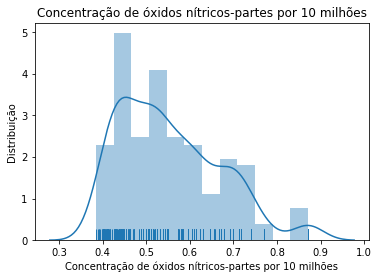

In [16]:
# Distribuição NOX

# Defino a colula
col = 'NOX'

# Defino o label
label= 'Concentração de óxidos nítricos-partes por 10 milhões'

# Plot 
distPlot(df_train,col,label)

A concentração de  óxidos nítricos possuem uma densidade maior entre 4 e 6 aproximadamente tendo o pico maior no valor 4,5 aproximadamente. 

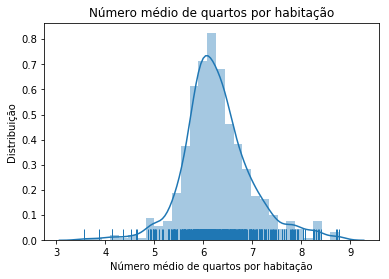

In [17]:
# Distribuição RM

# Defino a colula
col = 'RM'

# Defino o label
label= 'Número médio de quartos por habitação'

# Plot 
distPlot(df_train,col,label)

A distribuição dos cômodos por habitação tem uma distribuição normal ficando entre sua maioria entre 6 e 7 cômodos por casa. 

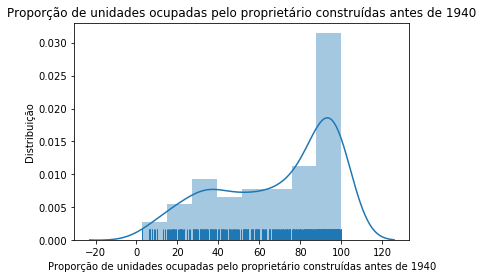

In [18]:
# Distribuição AGE

# Defino a colula
col = 'AGE'

# Defino o label
label= 'Proporção de unidades ocupadas pelo proprietário construídas antes de 1940'

# Plot 
distPlot(df_train,col,label)

O gráfico mostra que existe um número maior de casas mais antigas em relação as mais novas a curva fica maior entre 80 a 100.

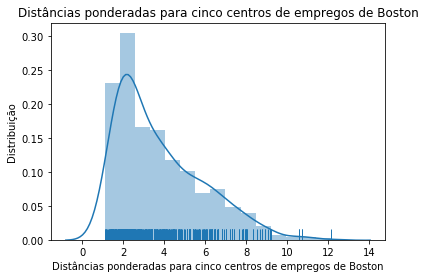

In [19]:
# Distribuição DIS

# Defino a colula
col = 'DIS'

# Defino o label
label= 'Distâncias ponderadas para cinco centros de empregos de Boston'

# Plot 
distPlot(df_train,col,label)

O gráfico mostra que a curva maior em relação a distância ponderada para cinco centros de empregos se encontra entre 1 a 2,5. 

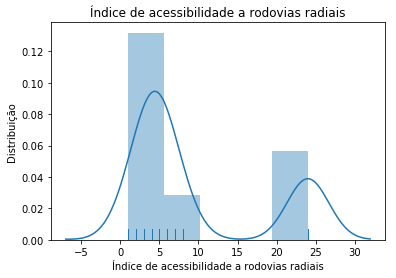

In [20]:
# Distribuição RAD

# Defino a colula
col = 'RAD'

# Defino o label
label= 'Índice de acessibilidade a rodovias radiais'

# Plot 
distPlot(df_train,col,label)

O gráfico mostra que a existe uma densidade maior ( 4 ), e menor ( 24 ) aproximadamente em relação a acessibilidade a  rodovias radiais. 

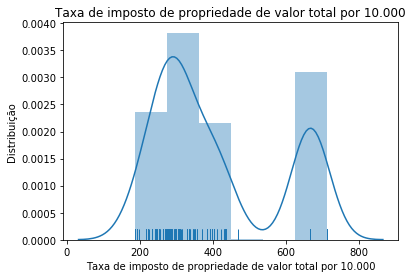

In [21]:
# Distribuição TAX

# Defino a colula
col = 'TAX'

# Defino o label
label= 'Taxa de imposto de propriedade de valor total por 10.000'

# Plot 
distPlot(df_train,col,label)

O gráfico mostra duas faixas com mais taxa de imposto por propriedades, a faixa maior fica entre 200 e 400 e a um pouco menor entre 600 e 800. 

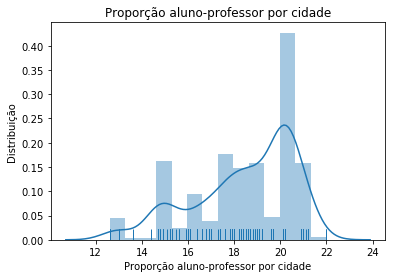

In [22]:
# Distribuição PTRATIO

# Defino a colula
col = 'PTRATIO'

# Defino o label
label= 'Proporção aluno-professor por cidade'

# Plot 
distPlot(df_train,col,label)

  O gráfico mostra uma densidade crescente em relação à proporção de aluno professor por cidade, tendo um pico maior no valor 20 aproximadamente.  

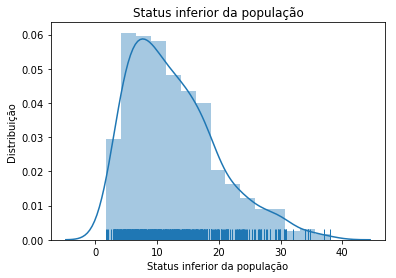

In [23]:
# Distribuição LSTAT

# Defino a colula
col = 'LSTAT'

# Defino o label
label= 'Status inferior da população'

# Plot 
distPlot(df_train,col,label)

O gráfico aparenta ter uma distribuição normal positiva, onde a os valores se encontra mais a esquerda da curva.  

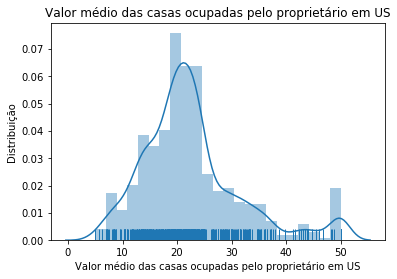

In [24]:
# Distribuição MEDV

# Defino a colula
col = 'MEDV'

# Defino o label
label= 'Valor médio das casas ocupadas pelo proprietário em US'

# Plot 
distPlot(df_train,col,label)

Podemos ver que todas as variáveis não estão em uma distribuição normal dos dados, com exceção da RM que está em uma distribuição normal perfeita.

### Boxplots das variáveis 

[Text(0.5, 0, 'Status inferior da população')]

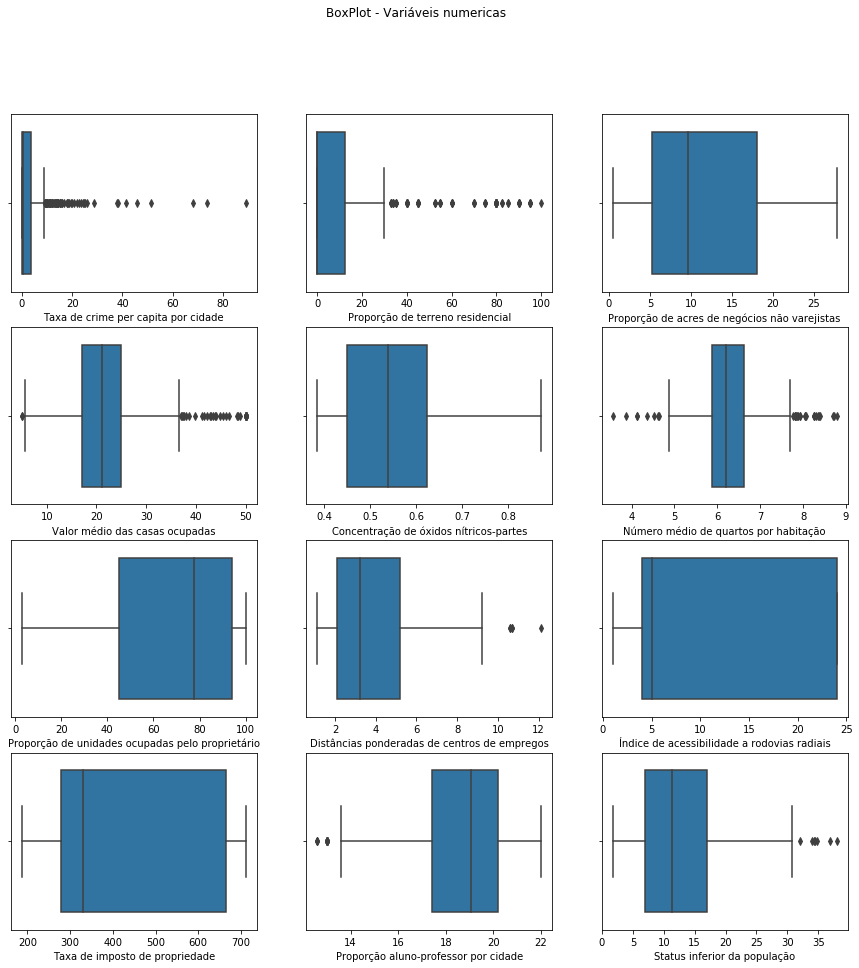

In [25]:
# Crio a figura e o eixo 4x3
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
# Defun o titulo Geral
fig.suptitle('BoxPlot - Variáveis numericas')
# Defuno cada plot nas posições e variáveis correta. 
sns.boxplot(ax=axes[0, 0], data=df_train, x='CRIM').set(xlabel='Taxa de crime per capita por cidade')
sns.boxplot(ax=axes[0, 1], data=df_train, x='ZN').set(xlabel='Proporção de terreno residencial')
sns.boxplot(ax=axes[0, 2], data=df_train, x='INDUS').set(xlabel='Proporção de acres de negócios não varejistas')
sns.boxplot(ax=axes[1, 1], data=df_train, x='NOX').set(xlabel='Concentração de óxidos nítricos-partes')
sns.boxplot(ax=axes[1, 0], data=df_train, x='MEDV').set(xlabel='Valor médio das casas ocupadas')
sns.boxplot(ax=axes[1, 2], data=df_train, x='RM').set(xlabel='Número médio de quartos por habitação')
sns.boxplot(ax=axes[2, 0], data=df_train, x='AGE').set(xlabel='Proporção de unidades ocupadas pelo proprietário')
sns.boxplot(ax=axes[2, 1], data=df_train, x='DIS').set(xlabel='Distâncias ponderadas de centros de empregos')
sns.boxplot(ax=axes[2, 2], data=df_train, x='RAD').set(xlabel='Índice de acessibilidade a rodovias radiais')
sns.boxplot(ax=axes[3, 0], data=df_train, x='TAX').set(xlabel='Taxa de imposto de propriedade')
sns.boxplot(ax=axes[3, 1], data=df_train, x='PTRATIO').set(xlabel='Proporção aluno-professor por cidade')
sns.boxplot(ax=axes[3, 2], data=df_train, x='LSTAT').set(xlabel='Status inferior da população')


Variáveis como CRIM, ZN, NOX, MEDV, RM, possuem muitos do que chamamos de outliers, ou seja os pontos fora da curvas, valores que fogem do padrão, a MEDV por exemplos algumas casas possuem um valor muito acima da média, o que leva a crer que podem ser casas maiores, em lugares melhores e de rende mais alta. A RM diz que temos casas com uma média de quartos, mas possuem poucas outras com muito menos quartos que a média ou muitos quartos acima da média. As demais varáveis os valores estão dentro dos extremos mínimo e máximo não possuindo outliers consequentemente.

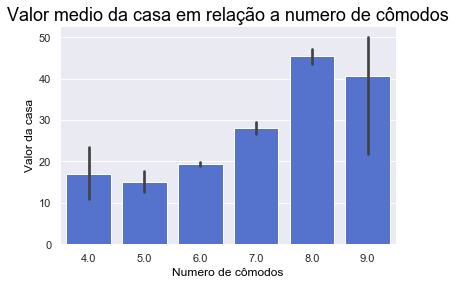

In [26]:
df_train.RM
# Defino o eixo X 
col1 = df_train.RM.round()
# Defino o eixo Y 
col2 = 'MEDV'
# Defino o titulo 
title = "Valor medio da casa em relação a numero de cômodos"
# Defino o label y
labely = 'Valor da casa'
# Defino o label x 
labelx = 'Numero de cômodos'
# Defino a cor para as barras
cor = 'RoyalBlue'
#plot
barPlotH(df_train, col1, col2, title, labelx, labely,cor)

O gráfico mostra o que casas com mais cômodos tendem a ser mais caras, o que é natural. 
Mas possuem algumas variáveis, como casas com 4 cômodos serem mais caras que de 5 ou até mesmo algumas de 6, pode ser que essas sejam em lugares melhores, mais vantajosos em uma característica geral, não apenas de tamanho. 


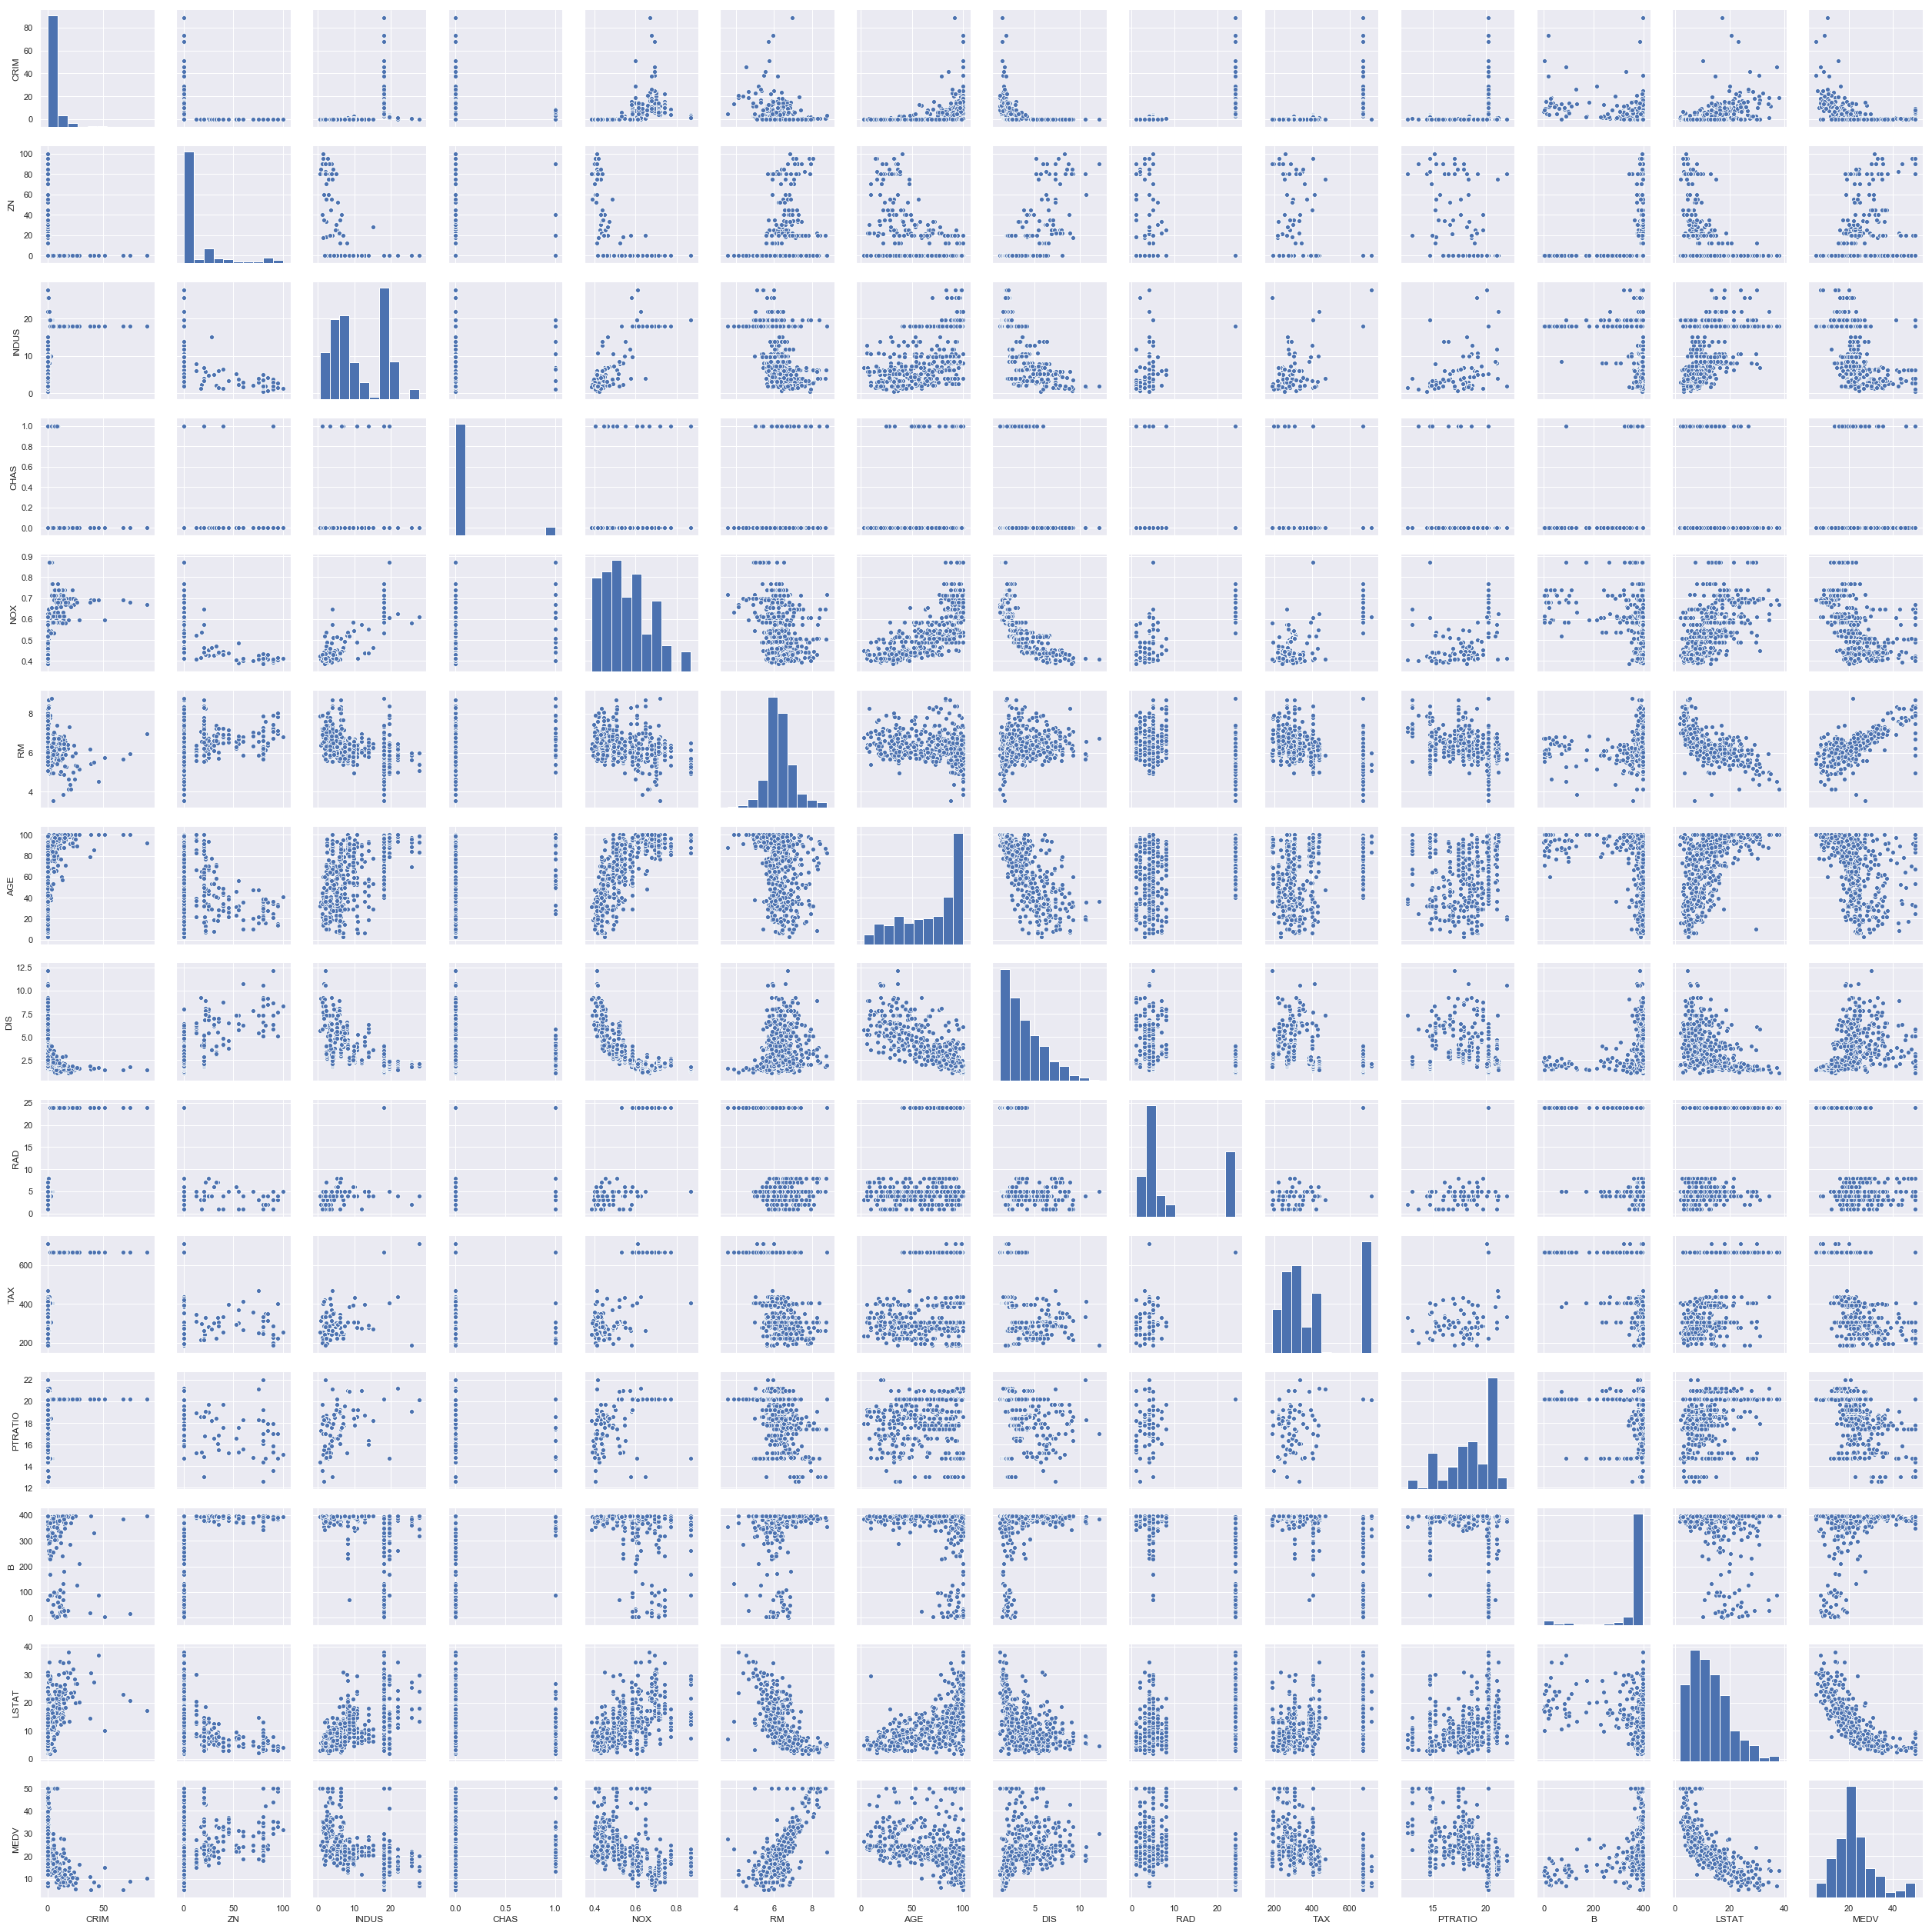

In [27]:
# Faço um Pairplot de todo o data frame 
sns.pairplot(df_train)

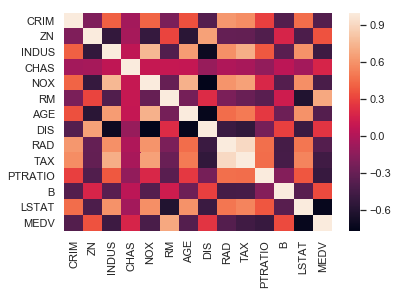

In [28]:
# Grafico de Correlação das variáveis

# crio a matriz de correlação
corr = df_train.corr()
# Crio o grafico
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [29]:
# Essa matriz de correlação ja mostros os valores da correção em cada variável. 
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_train.corr()
corr.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993,-0.468536


Podemos ver nos dois graficos que todas as variáveis possuem uma correlação consideravelmente boa em relação a MEDV

## Tratamento dos dados

In [53]:
# Separo a variável target  criando uma variável so para ela. 
train_target = df_train['MEDV']

# Retiro a target para deixando as features
train_features =df_train.drop(labels = 'MEDV', axis = 1)


In [54]:
# Aqui eu ja converto a target para as 3 escalas que iremos converter as features para usa-las nos modelos.

# MinMaxScaler
scalerMM = MinMaxScaler()
valsM = scalerMM.fit_transform(df_train)
targetMM_train = pd.DataFrame(valsM)[13]

# Normalizer
scalerN = Normalizer()
valsN = scalerN.fit_transform(df_train)
targetN_train = pd.DataFrame(valsN)[13]

# StandardScaler
scalerSS = StandardScaler()
valsSS = scalerSS.fit_transform(df_train)
targetSS_train = pd.DataFrame(valsSS)[13]

## Feature Selection

### Funções auxiliares

Criarei algumas funções auxiliares que nos ajudarão a normalizar os dados, selecionar as melhores variáveis

In [55]:
def dataNormalization(features, transform = None):
    
    if transform == 'MM':
        scaler = MinMaxScaler()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        # Caso precise voltar ao padrão use a função inverse_transform
        # scaler.inverse_transform(features)
        
    elif transform == 'N':
        scaler = Normalizer()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        
    elif transform == 'SS':
        scaler = StandardScaler()
        rescaled_features = scaler.fit_transform(features)
        # DataFrame com os resultados.
        rescaled_featuresDF = pd.DataFrame(data = rescaled_features, columns = features.columns)
        # Caso precise voltar ao padrão use a função inverse_transform
        # scaler.inverse_transform(features, copy=None)
        
    return rescaled_featuresDF

In [56]:
# Função para seleção das melhores variáveis 

# KindSelection = None -> padrão para todos, função que determina qual sera o algortmo de seleção
# feature_number = None -> quantidade de variáveis com mais importancia.
# columns = None -> Padrão para todos, deve criar uma variavel columns contendo os nomes das variaveis.
# score_func = None -> usado no Selectbest, como por exemplo chi2 ou f_classif caso de erro de numeros negativos
# n_estimators = None -> usado no RandomForestRegressor, por exemplo 200.
# random_state = usado no RandomForestRegressor.
# discrete_features = None -> usado no ExtraTreesRegressor, exemplo 'auto'

def FeatureSelection (features, target,columns = None, KindSelection = None, score_func = None, feature_number = None, n_estimators = None, random_state = None, discrete_features = None):
    
    # Usando o SelectKBest para seleção das variáveis
    if KindSelection == 'SKB':
        best_var = SelectKBest(score_func, k = feature_number)
        features_SKB = best_var.fit_transform(features, target)
        Best_features = columns[best_var.get_support()]
    
    # Usando o ExtraTreesRegressor para seleção das variáveis
    elif KindSelection == 'ETR':
        best_var = ExtraTreesRegressor()
        features_ETR = best_var.fit(features, target)
        features_importance = pd.DataFrame(data = features_ETR.feature_importances_, index = columns, columns = ['Importance_Score'])
        Best_features = features_importance.sort_values(by = 'Importance_Score', ascending = False).head(feature_number)
     
    
    # Usando o RandomForestRegressor para seleção das variáveis
    elif KindSelection == 'RFR':
        best_var = RandomForestRegressor(n_estimators = n_estimators,random_state = random_state)
        features_RFR= best_var.fit(features, target)
        predictF =features_RFR.predict(features)
        features_importance = pd.Series(data =features_RFR.feature_importances_, index = columns)
        Best_features_RFR = features_importance.nlargest(feature_number)
        Best_features = Best_features_RFR.index

    # Usando o mutual_info_regression para seleção das variáveis
    elif KindSelection == 'MIR':
        best_var = mutual_info_regression(features, target, discrete_features , n_neighbors = 3 )
        features_importance = pd.DataFrame(best_var, index = columns,  columns = ['Importance_Score'])
        Best_features = features_importance.sort_values(by='Importance_Score', ascending=False).head(feature_number)
        
    return Best_features

### Selecionando variáveis mais importantes em cada algortimo

#### Min Max Scaler

In [146]:
# Pego os nomes das colunas 
columns = train_features.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainMM = dataNormalization(features = train_features , transform = 'MM')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainMM, target=targetMM_train, KindSelection ='SKB' , columns = columns, score_func = f_classif, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesRegressor
variaveis_ETR= FeatureSelection(features=X_trainMM, target=targetMM_train, KindSelection ='ETR' , columns = columns, score_func = None, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_regression
variaveis_MIR= FeatureSelection(features=X_trainMM, target=targetMM_train, KindSelection ='MIR' , columns = columns, score_func = None, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Seleção de variável com o RandomForestRegressor
variaveis_RFR= FeatureSelection(features=X_trainMM, target=targetMM_train, KindSelection ='RFR' , columns = columns, score_func = None, feature_number = 4, n_estimators = 200,
                      random_state = 0, discrete_features = None)

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETR.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIR.index), pd.Series(variaveis_RFR)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
featuresMM_train = X_trainMM[[i for i in X_trainMM if i in feature.values]]

# Retiro possiveis colunas duplicadas
featuresMM_train = featuresMM_train.T.drop_duplicates().T

featuresMM_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

#### Normalizer

In [147]:
# Pego os nomes das colunas 
columns = train_features.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainN = dataNormalization(features = train_features , transform = 'N')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainN, target=targetN_train, KindSelection ='SKB' , columns = columns, score_func = f_classif, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesRegressor
variaveis_ETR= FeatureSelection(features=X_trainN, target=targetN_train, KindSelection ='ETR' , columns = columns, score_func = None, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_regression
variaveis_MIR= FeatureSelection(features=X_trainN, target=targetN_train, KindSelection ='MIR' , columns = columns, score_func = None, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Seleção de variável com o RandomForestRegressor
variaveis_RFR= FeatureSelection(features=X_trainN, target=targetN_train, KindSelection ='RFR' , columns = columns, score_func = None, feature_number = 4, n_estimators = 200,
                      random_state = 0, discrete_features = None)

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETR.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIR.index), pd.Series(variaveis_RFR)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
featuresN_train = X_trainN[[i for i in X_trainN if i in feature.values]]

# Retiro possiveis colunas duplicadas
featuresN_train = featuresN_train.T.drop_duplicates().T

featuresN_train.columns

Index(['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='object')

#### StandardScaler

In [148]:
# Pego os nomes das colunas 
columns = train_features.columns

# Usando a função de normalização convertos os dados para a escala min max scaler
X_trainSS = dataNormalization(features = train_features , transform = 'SS')

# Seleção de variável com o SelectKBest
variaveis_SKB = FeatureSelection(features=X_trainSS, target=targetSS_train, KindSelection ='SKB' , columns = columns, score_func = f_classif, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o ExtraTreesRegressor
variaveis_ETR= FeatureSelection(features=X_trainSS, target=targetSS_train, KindSelection ='ETR' , columns = columns, score_func = None, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = None)

# Seleção de variável com o mutual_info_regression
variaveis_MIR= FeatureSelection(features=X_trainSS, target=targetSS_train, KindSelection ='MIR' , columns = columns, score_func = None, feature_number = 4, n_estimators = None,
                      random_state = None, discrete_features = 'auto')

# Seleção de variável com o RandomForestRegressor
variaveis_RFR= FeatureSelection(features=X_trainSS, target=targetSS_train, KindSelection ='RFR' , columns = columns, score_func = None, feature_number = 4, n_estimators = 200,
                      random_state = 0, discrete_features = None)

# Junto todas as variáves em uma série do pandas para filtrar no df geral. 
feature = pd.concat([pd.Series(variaveis_ETR.index),pd.Series(variaveis_SKB), pd.Series(variaveis_MIR.index), pd.Series(variaveis_RFR)],ignore_index=True)

# Trago todos as variáveis e passo em um list comprehension para criar um df com apenas as variáveis selecionadas. 
featuresSS_train = X_trainSS[[i for i in X_trainSS if i in feature.values]]

# Retiro possiveis colunas duplicadas
featuresSS_train = featuresSS_train.T.drop_duplicates().T

featuresSS_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

#### Salvo as variáveis selecionada por cada algortimo

In [149]:
featuresMM_train.to_csv('Dados/X_featureMM.csv',encoding='utf-8', index=None)
featuresN_train.to_csv('Dados/X_featureN.csv',encoding='utf-8', index=None)
featuresSS_train.to_csv('Dados/X_featureSS.csv',encoding='utf-8', index=None)

#### Caso decida ja carregar as variaveis ja tratadas, descomente as linhas abaixo

In [131]:
# Carregando as os data frame salvo anteriomente 
# featuresMM_train = pd.read_csv('Dados/X_featureMM.csv')
# featureN_train = pd.read_csv('Dados/X_featureN.csv')
# featureSS_train = pd.read_csv('Dados/X_featureSS.csv')


## Análise preditiva

### Funções auxiliares

In [132]:
def regressorAlgorithms(X_train, Y_train, X_test, Y_test):
    
    # Preparando a lista de modelos
    modelos = []
    modelos.append(('LR',LinearRegression()))
    modelos.append(('EN',ElasticNet()))
    modelos.append(('KNN',KNeighborsRegressor()))
    modelos.append(('CART',DecisionTreeRegressor()))
    modelos.append(('SVR',SVR()))
    modelos.append(('RF',RandomForestRegressor()))
    modelos.append(('GBR',GradientBoostingRegressor()))
    modelos.append(('MPLR',MLPRegressor()))

    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        # Treino o modelo
        modelo.fit(X_train, Y_train)

        # Faço as Previsões de teste
        previsao = modelo.predict(X_test)

        # Verifico a precisão do modelo com as metrias MAE e R^2.
        resultMAE = mean_absolute_error(Y_test, previsao) 
        resultR2 = r2_score(Y_test,previsao)
        resultados.append(resultMAE)
        resultados.append(resultR2)
        nomes.append(nome)
        print(f'{nome}: MAE:{resultMAE:.2f}% / R2:{resultR2:.2f}% \n')
        

In [133]:
def regressorAlgorithmsEnsemble(X_train, Y_train, X_test, Y_test):
    
    # Preparando a lista de modelos
    modelos = []
    # Modelo Bagging Regressor
    modelos.append(('BC',BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)))
    
    # Modelo Voting Regressor
    # Coloco todos os modelos criados em uma lista para usar no algoritmo.
    estimators = []
    estimators.append(('KNN',KNeighborsRegressor()))
    estimators.append(('EN',ElasticNet()))
    estimators.append(('RF',RandomForestRegressor()))
    estimators.append(('GBR',GradientBoostingRegressor()))
    estimators.append(('MPLR',MLPRegressor()))
    

    # Crio o modelo
    modelos.append(('VR',VotingRegressor(estimators=estimators)))
    
    # Modelo com o StackingRegressor
    modelos.append(('SR',StackingRegressor(estimators=estimators)))

    # modelo com o AdaBoostRegressor
    modelos.append(('ABR',AdaBoostRegressor()))
       
    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []
    
    for nome, modelo in modelos:
        # Treino o modelo
        modelo.fit(X_train, Y_train)

        # Faço as Previsões de teste
        previsao = modelo.predict(X_test)
    
     # Verifico a precisão do modelo com as metrias MAE e R^2.
        resultMAE = mean_absolute_error(Y_test, previsao) 
        resultR2 = r2_score(Y_test,previsao)
        resultados.append(resultMAE)
        resultados.append(resultR2)
        nomes.append(nome)
        print(f'{nome}: MAE:{resultMAE:.2f}% / R2:{resultR2:.2f}% \n')

### Split dos dados

Farei a divisão para cada tipo de dado Normalizado. 

In [151]:
# Min Max Scaler
# Faço a divisão dos dados treino e teste parar usar nos algoritmos 

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_trainMM, X_testMM, Y_trainMM, Y_testMM = train_test_split(featuresMM_train, targetMM_train, test_size = teste_size)


# Normalizer
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_trainN, X_testN, Y_trainN, Y_testN = train_test_split(featuresN_train, targetN_train, test_size = teste_size)


# Standard Scaler
# Faço a divisão dos dados treino e teste

# Definindo o tamanho das amostras
teste_size = 0.33

# Divisão dos dados 
X_trainSS, X_testSS, Y_trainSS, Y_testSS = train_test_split(featuresSS_train, targetSS_train, test_size = teste_size)



### Variáveis selecionadas com o Min Max Scaler

#### Algotitmos Individuais

In [153]:
# Passo os dados para a função de predição 
regressorAlgorithms(X_trainMM, Y_trainMM, X_testMM, Y_testMM)

LR: MAE:0.07% / R2:0.74% 

EN: MAE:0.15% / R2:-0.01% 

KNN: MAE:0.06% / R2:0.82% 

CART: MAE:0.07% / R2:0.73% 

SVR: MAE:0.06% / R2:0.84% 

RF: MAE:0.05% / R2:0.87% 

GBR: MAE:0.05% / R2:0.87% 

MPLR: MAE:0.07% / R2:0.74% 



Nos dados Min Max Scaler o algoritmo individual com melhor performance foi  o RandomForestRegressor e o GradientBoostingRegressor

#### Algotitmos Ensemble

In [154]:
# Passo os dados para a função de predição 
regressorAlgorithmsEnsemble(X_trainMM, Y_trainMM, X_testMM, Y_testMM)

BC: MAE:0.05% / R2:0.88% 

VR: MAE:0.06% / R2:0.82% 

SR: MAE:0.05% / R2:0.88% 

ABR: MAE:0.06% / R2:0.87% 



Nos dados Min Max Scaler o algoritmo ensemble com melhor performance foi o StackingRegressor

### Variáveis selecionadas com o Normalizer

#### Algotitmos Individuais

In [155]:
# Passo os dados para a função de predição 
regressorAlgorithms(X_trainN, Y_trainN, X_testN, Y_testN)

LR: MAE:0.01% / R2:0.81% 

EN: MAE:0.02% / R2:-0.00% 

KNN: MAE:0.01% / R2:0.74% 

CART: MAE:0.01% / R2:0.82% 

SVR: MAE:0.02% / R2:-0.69% 

RF: MAE:0.00% / R2:0.89% 

GBR: MAE:0.00% / R2:0.90% 

MPLR: MAE:0.01% / R2:0.50% 



Nos dados normalizer o algoritmo individual com melhor performance foi o GradientBoostingRegressor e o RandomForestRegressor 

#### Algotitmos Ensemble

In [156]:
# Passo os dados para a função de predição 
regressorAlgorithmsEnsemble(X_trainN, Y_trainN, X_testN, Y_testN)

BC: MAE:0.00% / R2:0.89% 

VR: MAE:0.01% / R2:0.71% 

SR: MAE:0.01% / R2:0.86% 

ABR: MAE:0.01% / R2:0.88% 



Nos dados Normalizer o algoritmo ensemble com melhor performance foi o BaggingRegressor

### Variáveis selecionadas com o StandardScaler

#### Algotitmos Individuais

In [157]:
# Passo os dados para a função de predição 
regressorAlgorithms(X_trainSS, Y_trainSS, X_testSS, Y_testSS)

LR: MAE:0.37% / R2:0.73% 

EN: MAE:0.59% / R2:0.29% 

KNN: MAE:0.29% / R2:0.82% 

CART: MAE:0.31% / R2:0.77% 

SVR: MAE:0.26% / R2:0.83% 

RF: MAE:0.24% / R2:0.88% 

GBR: MAE:0.24% / R2:0.88% 

MPLR: MAE:0.29% / R2:0.82% 



C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nos dados Standard Scaler o algoritmo individual com melhor performance foi o GradientBoostingRegressor

#### Algotitmos Ensemble

In [158]:
# Passo os dados para a função de predição 
regressorAlgorithmsEnsemble(X_trainSS, Y_trainSS, X_testSS, Y_testSS)

BC: MAE:0.24% / R2:0.87% 



C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VR: MAE:0.27% / R2:0.84% 



C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\s

SR: MAE:0.24% / R2:0.88% 

ABR: MAE:0.30% / R2:0.83% 



C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nos dados Standard Scaler o algoritmo ensemble com melhor performance foi o StackingRegressor

## Analise preditiva com os mehores modelos.

### Criação dos modelos com melhores desempenho e aplico algumas otmizações.

Usarei GradientBoostingRegressor e o RandomForestRegressor com os dados no Normalizer e o StackingRegressor com os dados Standard Scaler, baseados nas performances nos testes. 

#### GradientBoostingRegressor /RandomForestRegressor - Normalizer

Usando o GridSearchCV buscarei melhores parametros para o RandomForestRegressor nos dados Nomalizer

In [72]:
# Crio o grip para os testes de Otmização 
param_grid = dict (
    n_estimators      = [100, 105, 110, 115], 
    max_depth         = [None, 2, 4, 6,10],
    max_features      = ['auto', 'sqrt', 'log2'], 
    min_samples_split = [2, 4, 5, 8, 9,11],
    min_samples_leaf  = [1, 2, 3,5]
)

# Crio o modelo 
modeloRF = RandomForestRegressor()

# Buscando os melhores paramentros.
gridRF = GridSearchCV(estimator = modeloRF, param_grid = param_grid, cv = 5, verbose = 3, n_jobs = -1)

# Rodando o algoritmo nos dados treino
gridRF.fit(X_trainN,Y_trainN)

# Imprimo o que o algortimo selecionou como melhores paramentros.
print(f'Melhores Paramentros para o modelo RF: {gridRF.best_estimator_}')

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Melhores Paramentros para o modelo RF: RandomForestRegressor(n_estimators=115)


Usando os melhores parâmetros eu crio o modelo final.

In [168]:
# Crio o modelo 
modeloRF = RandomForestRegressor(n_estimators=115,max_depth =None,
                                 min_samples_split = 10,min_samples_leaf = 3,
                                 max_features ='auto' )

# Treino o modelo
modeloRF.fit(X_trainN, Y_trainN)

# Faço as Previsões de teste
previsao = modeloRF.predict(X_testN)
    
# Verifico a precisão do modelo com as metrias MAE e R^2.
resultMAE = mean_absolute_error(Y_testN, previsao) 
resultR2 = r2_score(Y_testN,previsao)
print(f'MAE:{resultMAE:.2f}% / R2:{resultR2:.2f}% \n')

MAE:0.00% / R2:0.89% 



Mesmo otimizando o modelo não teve uma melhora ficou nos 89% de precisão como no modelo puro, porem o MAE é igual a 0 que e bom, para esses dados apresentados ele chegou no seu limite, embora seja uma boa métrica caso seja necessário um acurácia maior, poderia tentar aumentar os dados de treino, ou até mesmo refazer os algoritmos de seleção de variável.
Para esse projeto vou aceitar 89% como de Acurácia ok.


Usando o GridSearchCV buscarei melhores parametros para o GradientBoostingRegressor nos dados Nomalizer

In [96]:
# Crio o grip para os testes de Otmização 
param_grid = dict (
    max_depth      = [5, 16, 2, 5, 8], 
    max_features      = ['auto', 'sqrt'], 
    min_samples_split = [2, 5, 9,11],
    min_samples_leaf  = [1, 2,3, 5]
)

# Crio o modelo 
modeloGBR = GradientBoostingRegressor()

# Buscando os melhores paramentros.
gridGBR = GridSearchCV(estimator = modeloGBR, param_grid = param_grid, cv = 5, verbose = 3, n_jobs = -1)

# Rodando o algoritmo nos dados treino
gridGBR.fit(X_trainN,Y_trainN)

# Imprimo o que o algortimo selecionou como melhores paramentros.
print(f'Melhores Paramentros para o modelo GBR: {gridGBR.best_estimator_}')

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Melhores Paramentros para o modelo GBR: GradientBoostingRegressor(max_depth=8, max_features='sqrt',
                          min_samples_split=11)


In [169]:
# Crio o modelo 
modeloGBR = GradientBoostingRegressor(max_depth=8, max_features='sqrt',
                          min_samples_split=11)

# Treino o modelo
modeloGBR.fit(X_trainN, Y_trainN)

# Faço as Previsões de teste
previsao = modeloGBR.predict(X_testN)
    
# Verifico a precisão do modelo com as metrias MAE e R^2.
resultMAE = mean_absolute_error(Y_testN, previsao) 
resultR2 = r2_score(Y_testN,previsao)
print(f'MAE:{resultMAE:.2f}% / R2:{resultR2:.2f}% \n')



MAE:0.00% / R2:0.91% 



Com a otimização conseguimos melhorar em 1% a acurácia do modelo em relação ao padrão e temos o MAE igual a 0 que é muito bom,  assim com o Random Forest caso seja preciso melhorar podemos fazer o que foi sugerido acima. Para esse modelo vamos aceitar os 91% de acurácia. 

### StackingRegressor - Standard Scaler

Usando o GridSearchCV buscarei melhores parametros para o StackingRegressor nos dados Standard Scaler

In [99]:
# Modelo SV
# Crio o grip para os testes de Otmização
param_grid = {'C': [0.1, 1, 10], 'gamma': [1,0.1,0.01,],'kernel': ['rbf', 'poly']}
# Buscando os melhores paramentros
gridSVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
# Rodando o algoritmo nos dados treino
gridSVR.fit(X_trainSS,Y_trainSS)
# Imprimo o que o algortimo selecionou como melhores paramentros.
print(f'Melhores Paramentros para o modelo RF: {gridSVR.best_estimator_}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

Usando os melhores parâmetros eu crio o modelo final.

In [170]:
# Crio o modelo SVR com os melhores parametros 
modeloSVR = SVR(C=10, gamma=0.1)

# # Crio o modelo colocando o modelo otimizado do modeloGBR e o modeloRF
estimators = []
estimators.append(('KNN',KNeighborsRegressor()))
estimators.append(('EN',ElasticNet()))
estimators.append(('RF',modeloRF))
estimators.append(('GBR',modeloGBR))
estimators.append(('MPLR',MLPRegressor()))
estimators.append(('SVR',modeloSVR))
    
# Modelo com o StackingRegressor
modeloSR = StackingRegressor(estimators=estimators)

# Treino o modelo
modeloSR.fit(X_trainSS, Y_trainSS)

# Faço as Previsões de teste
previsao = modeloSR.predict(X_testSS)
    
# Verifico a precisão do modelo com as metrias MAE e R^2.
resultMAE = mean_absolute_error(Y_testSS, previsao) 
resultR2 = r2_score(Y_testSS,previsao)
print(f'MAE:{resultMAE:.2f}% / R2:{resultR2:.2f}% \n')

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\s

MAE:0.23% / R2:0.88% 



C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Não teve melhora assim como o randomForest, provavelmente para melhora sera necessario fazer o que voi proposto acima, porem para o projeto vou aceitar o limite para esses dados de 88%, porem esse ja com um MAE: de 23%, que não é tão bom quanto os demais.

## Considerações finais 


Para previsões em dados novos a melhor opção para esse projeto seria o GradientBoostingRegressor com os dados transformados no normalize, que tiveram uma acurácia de 91% e um MAE de 0% que é o ideal. 

## Obrigado! Entre em contato comigo acessando meu portifolio (https://campos1989.github.io/) no menu contato!